# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [231]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib


# Create two new dataframes
north_df=pd.read_csv('NorthCallCenter.csv')
south_df=pd.read_csv('SouthCallCenter.csv')
north_df.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [232]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [233]:
# Put your EDA code here
north_df['Rep ID'].value_counts()
#9 reps in North branch




Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [234]:
south_df['Rep ID'].value_counts()
#11 reps in south branch

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [235]:
#Q2
north_df['Not Ready Minutes'].mean()


1.9142857142857144

In [236]:
north_df['Incoming Wait Time'].mean()

3.048780487804878

In [237]:
north_df['During Call Wait Time'].mean()

2.9673469387755103

In [445]:
north_df['Busy Minutes'].mean()

9.987755102040817

In [238]:
south_df['Not Ready Minutes'].mean()

1.910828025477707

In [239]:
south_df['Incoming Wait Time'].mean()

3.0

In [240]:
south_df['During Call Wait Time'].mean()

3.0764331210191083

In [446]:
south_df['Busy Minutes'].mean()

10.054140127388536

In [241]:
#Q3
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [242]:
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [ ]:
#EDA Results
#1.9 reps in North branch
#11 reps in south branch
#2.North Not Ready Minutes 1.9142857142857144,South 1.910828025477707
# North incoming wait time 3.048780487804878, South 3.0
# North During Call Wait Time 2.9673469387755103, South 3.0764331210191083
#North Busy Minutes 9.987755102040817, South 10.054140127388536
#3. North
#12:00 PM    45
#10:00 AM    43
#2:00 PM     35
#3:00 PM     30
#4:00 PM     28
#11:00 AM    25
#1:00 PM     17
#5:00 PM     17
#9:00 AM      5
#3. South
#12:00 PM    75
#10:00 AM    56
#3:00 PM     43
#11:00 AM    31
#2:00 PM     30
#5:00 PM     26
#4:00 PM     25
#1:00 PM     23
#9:00 AM      5



## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [243]:
# Clean your data here #Q1.
north_df[north_df['Incoming Wait Time'].isnull()]


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
82,82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
83,83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,NaN,4,1
84,84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
85,85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,NaN,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [244]:
#Q1 
north_df.loc[north_df['Incoming or Outgoing']=='Outgoing']


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
82,82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
83,83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,NaN,4,1
84,84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
85,85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,NaN,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [245]:
#q1
south_df[south_df['Incoming Wait Time'].isnull()]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
126,126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,NaN,4,1
127,127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,NaN,4,1
128,128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,NaN,4,1
129,129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,NaN,4,1
130,130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [246]:
#Q1
south_df.loc[(south_df['Incoming or Outgoing']=='Outgoing')&(south_df['Incoming Wait Time'].isnull())].head(50)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
126,126,South,Product Support,9:00 AM,Outgoing,C,Sandy,NO,1,0,12,2,NaN,4,1
127,127,South,Product Support,9:00 AM,Outgoing,C,Susan,NO,1,0,9,3,NaN,4,1
128,128,South,Product Support,9:00 AM,Outgoing,D,Karl,NO,1,0,9,3,NaN,4,1
129,129,South,Sales Support,10:00 AM,Outgoing,C,Susan,NO,1,0,8,2,NaN,4,1
130,130,South,Sales Support,11:00 AM,Outgoing,D,Josh,NO,1,0,9,2,NaN,4,1
131,131,South,Sales Support,12:00 PM,Outgoing,D,Josh,NO,1,0,12,1,NaN,3,1
132,132,South,Sales Support,12:00 PM,Outgoing,C,Sharon,NO,1,0,11,2,NaN,4,1
133,133,South,Product Support,1:00 PM,Outgoing,D,Randy,NO,1,0,9,1,NaN,3,1
134,134,South,Product Support,5:00 PM,Outgoing,D,Josh,NO,1,0,9,1,NaN,4,1
135,135,South,Product Support,5:00 PM,Outgoing,D,Randy,NO,1,0,9,3,NaN,2,1


In [247]:
#Q2
north_df['Sale']=north_df['Sale'].str.rstrip()
print(north_df['Sale'].head(50))
#used the rstrip() to strip white space

0      NO
1      NO
2      NO
3      NO
4      NO
5      NO
6      NO
7      NO
8      NO
9      NO
10     NO
11     NO
12     NO
13     NO
14     NO
15     NO
16     NO
17     NO
18     NO
19    YES
20     NO
21     NO
22     NO
23     NO
24     NO
25     NO
26     NO
27     NO
28     NO
29     NO
30     NO
31     NO
32     NO
33     NO
34     NO
35     NO
36     NO
37     NO
38     NO
39     NO
40    YES
41     NO
42     NO
43     NO
44     NO
45     NO
46     NO
47    YES
48     NO
49     NO
Name: Sale, dtype: object


In [248]:
#Q3
duplicates=north_df.duplicated()
duplicates.sum()
#no duplicates

0

In [249]:
duplicates2=south_df.duplicated()
duplicates2.sum()
#no duplicates

0

In [250]:
#Q4
north_df.drop(labels=None,axis=0,index=None,columns='Unnamed: 0',level=None,inplace=None,errors=None)
# dropped the unnamed column because it was unnecessary

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [251]:
north_df.head(55)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [252]:
#Q4
south_df.drop(labels=None,axis=0,index=None,columns='Unnamed: 0',level=None,inplace=None,errors=None)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [253]:
#Q1 part a
sumcallsn=north_df.sort_values(['Rep ID','Calls'],ascending=False).groupby('Rep ID').sum()
sumcallsn
# Manipulate data here

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23
Brent,4840,0,1,362,71,17.0,117,37
Cam,2746,1,0,233,46,32.0,66,24
Duke,2999,2,0,292,56,39.0,85,29
Joe,3178,0,0,256,49,36.0,81,26
Lilly,3375,0,2,307,59,37.0,88,30
Todd,4252,1,0,296,58,21.0,97,29
Xander,3340,1,0,244,44,20.0,68,24


In [254]:
#Q1part b
sumcallsn.value_counts(['Rep ID','Calls'])
#Brent has the most calls at the north call center

Rep ID  Calls
Amanda  23       1
Andy    23       1
Brent   37       1
Cam     24       1
Duke    29       1
Joe     26       1
Lilly   30       1
Todd    29       1
Xander  24       1
dtype: int64

In [255]:
#Q1 part a 
sumcallss=south_df.sort_values(['Rep ID','Calls'],ascending=False).groupby('Rep ID').sum()
sumcallss

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Alice,3637,0,0,199,46,15.0,58,20
Eric,5039,0,0,361,54,47.0,112,35
George,4620,0,0,298,53,41.0,87,29
Helga,5236,0,2,292,58,36.0,95,31
Josh,3960,3,0,260,50,31.0,83,26
Karl,4532,1,0,287,61,26.0,85,28
Kate,4615,0,0,291,61,37.0,83,29
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32


In [256]:
#Q1 part b
sumcallss.value_counts(['Rep ID','Calls'])
# Eric has the most calls in the south call center

Rep ID  Calls
Alice   20       1
Eric    35       1
George  29       1
Helga   31       1
Josh    26       1
Karl    28       1
Kate    29       1
Randy   33       1
Sandy   32       1
Sharon  25       1
Susan   26       1
dtype: int64

In [257]:
#Q2
dfavn=north_df['Abandoned'].mean()
dfav

0.02857142857142857

In [258]:
#Q2
dfavs=south_df['Abandoned'].mean()
dfavs

0.012738853503184714

In [344]:
#Q2
wholedf=pd.concat([north_df,south_df])
wholedf['Abandoned'].mean()


0.01967799642218247

In [260]:
#Q2
#the south call center data set is less than 2%

In [261]:
#Q3
#drop_with_NA_south=south_df.dropna(axis=0,how='any')
less_than_two_south=drop_with_NA_south['Incoming Wait Time']<=2
less_than_two_south.value_counts(normalize=True).mul(100).astype(str)+'%'
# the south call center has 38% of calls answered within 2 seconds

False    61.904761904761905%
True     38.095238095238095%
Name: Incoming Wait Time, dtype: object

In [347]:
#Q3 
#drop_with_NA=north_df.dropna(axis=0,how='any')
#drop_with_NA
less_than_two=north_df['Incoming Wait Time']<=2
less_than_two.value_counts(normalize=True).mul(100).astype(str)+'%'
#40% of calls answered within 2 seconds for north call center

False    86.53061224489797%
True     13.46938775510204%
Name: Incoming Wait Time, dtype: object

In [348]:
#Q3
frames=[north_df,south_df]
whole=pd.concat(frames)
whole
#whole_drop_NA=whole.dropna(axis=0,how='any')
less_than_two_whole=whole['Incoming Wait Time']<=2
less_than_two_whole.value_counts(normalize=True).mul(100).astype(str)+'%'
#as a whole company 38% of the calls are answered in less than 2 seconds

False      85.5098389982111%
True     14.490161001788909%
Name: Incoming Wait Time, dtype: object

In [264]:
#Q4
#speed_north=north_df['Incoming Wait Time'].sum()
#speed_north



250.0

In [275]:
#dropped=north_df.drop(north_df[(north_df['Abandoned']==1)&(north_df['Lost Call']==1)].index)
#sum_dropped=dropped['Calls'].sum()
#sum_dropped
#Q4 
north_plt = north_df.groupby("Calls")["Incoming Wait Time"].mean().to_frame().reset_index()
north_plt

,Calls,Incoming Wait Time
0,1,3.04878


In [276]:

#Q4
south_plt=south_df.groupby('Calls')['Incoming Wait Time'].mean().to_frame().reset_index()
south_plt

,Calls,Incoming Wait Time
0,1,3.0


In [282]:
#Q4
whole_plt=whole.groupby('Calls')['Incoming Wait Time'].mean().to_frame().reset_index()
whole_plt

,Calls,Incoming Wait Time
0,1,3.019231


In [267]:
#average_speed_north=speed_north/sum_dropped
#average_speed_north

1.0204081632653061

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [355]:
# Create visualization 1 here

# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = whole.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 



In [356]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

Text(0, 0.5, 'Abandonment Rate')

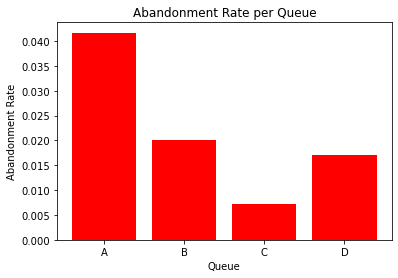

In [358]:
#Q1
plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center',color='red')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.title('Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')

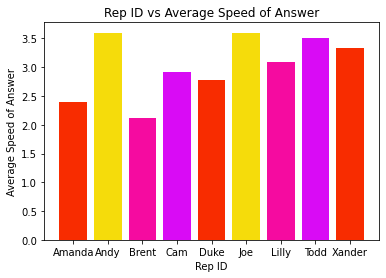

In [387]:
# Create visualization 2 here
#north

# north_plt contains the data you need for the average speed of answer of each rep
#Q2
north_df_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(north_df_plt['Rep ID'],north_df_plt['Incoming Wait Time'],color = ['#F82C00','#F5DC0B','#F50BA0','#D90BF5'])
plt.title('Rep ID vs Average Speed of Answer')
plt.xlabel('Rep ID')
plt.ylabel('Average Speed of Answer')
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()

# Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()
total_stats
# Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

In [330]:
#north
average_speed = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
average_speed

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


In [394]:
#north
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()
quick_calls
quick_reps
quick_stats

#number of calls answered in less than 2 seconds

,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


In [324]:
#north
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()
total_stats

#only incoming calls for each rep

,Calls
Rep ID,
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Joe,10
Lilly,12
Todd,6
Xander,6


<AxesSubplot:xlabel='Rep ID'>

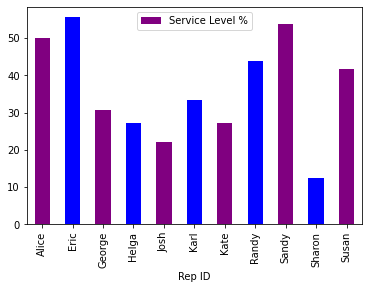

In [399]:
#north
#Q2
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level
service_level.plot(y='Service Level %',kind='bar',color=['purple','blue'])

In [396]:
#south
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()
quick_calls
quick_reps
quick_stats
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum()
total_stats

,Calls
Rep ID,
Alice,6
Eric,18
George,13
Helga,11
Josh,9
Karl,9
Kate,11
Randy,16
Sandy,13


<AxesSubplot:xlabel='Rep ID'>

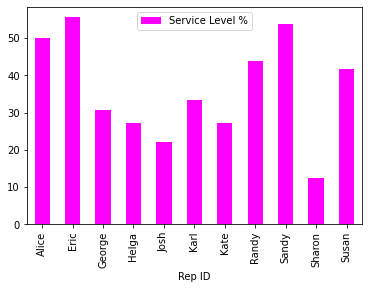

In [398]:
#south
#q2
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level
service_level.plot(y='Service Level %',kind='bar',color=['Magenta'])

Text(0, 0.5, 'Average Speed')

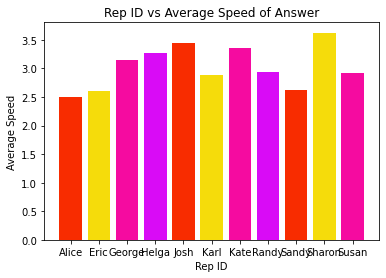

In [385]:
#south
#q2
south_df_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(south_df_plt['Rep ID'],south_df_plt['Incoming Wait Time'],color = ['#F82C00','#F5DC0B','#F50BA0','#D90BF6'])
plt.title('Rep ID vs Average Speed of Answer')
plt.xlabel('Rep ID')
plt.ylabel('Average Speed')

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


([<matplotlib.axis.XTick at 0x1b803c20550>,
 [Text(0, 0, 'Outgoing'), Text(1, 0, 'Incoming')])

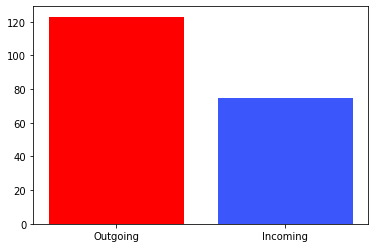

In [405]:
# Create visualization 3 here
#Q3
# The three dictionaries; complaints, sales_support, and product_support, have the information you need
#whole
purpose_group=whole.groupby('Call Purpose')
call_purpose=['Complaint','Product Support','Sales Support']
purpose_counts=purpose_group['Incoming or Outgoing'].value_counts()
print(purpose_counts)

#purpose_counts = whole["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

plt.bar(range(len(complaints)), list(complaints.values()), align='center',color='red')
plt.xticks(range(len(complaints)), list(complaints.keys()))
plt.show

plt.bar(range(len(sales_support)), list(sales_support.values()), align='center',color=['red','#3b57fc'])
plt.xticks(range(len(sales_support)), list(sales_support.keys()))


In [388]:
#Q3
outgoing_add={'Outgoing':0}
complaints.update(outgoing_add)
complaints

{'Incoming': 51, 'Outgoing': 0}

([<matplotlib.axis.XTick at 0x1b803a701f0>,
 [Text(0, 0, 'Incoming'), Text(1, 0, 'Outgoing')])

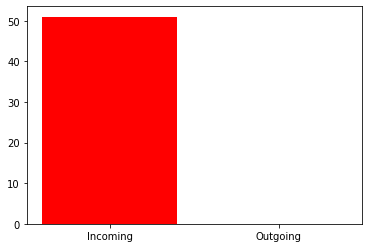

In [400]:
#Q3
plt.bar(range(len(complaints)), list(complaints.values()), align='center',color=['red','blue'])
plt.xticks(range(len(complaints)), list(complaints.keys()))

([<matplotlib.axis.XTick at 0x1b8005c0ca0>,
 [Text(0, 0, 'Outgoing'), Text(1, 0, 'Incoming')])

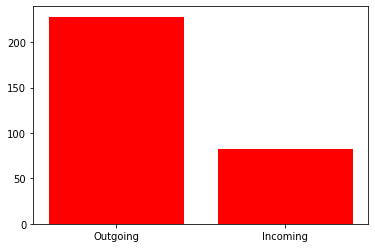

In [374]:
#Q3
plt.bar(range(len(product_support)), list(product_support.values()), align='center',color='red')
plt.xticks(range(len(product_support)), list(product_support.keys()))

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [ ]:
#1. The north has a higher abandonment rate than the south. But the north has more people with higher average speed of answer. on the other hand they have more people with lower service level. But we must also consider the north has less people in the branch. So because of this I think they working effecicently for having 3 less people but could be even better if they had one more. 
#2. The north
#3.I wish I had how long costumers wait on hold before they hang up. That information would be very helpful

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [444]:
# Create your visualization here!
call_times = whole[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:


#company_time_blocks.plot.bar(edgecolor = 'white')
#plt.title('calls purpose per time block',color = 'black')
#plt.xticks(color = 'black')
#plt.yticks(color = 'black')
#plt.xlabel('call purpose',color = 'black')
#plt.ylabel('calls',color = 'black')
#plt.legend(title = 'call purpose', fontsize = 12)


plt.show()
# Use groupby and get_group to select which call purpose to plot:
